In [1]:
import pandas as pd
data=pd.read_csv('ex8-3.csv')
data.head()

,program,number,y
0,news,10,47
1,news,10,43
2,drama,10,62
3,drama,10,68
4,entertainment,10,41


In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
fit=smf.ols('y~program+C(number)+program*C(number)', data).fit()
sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
program,2.0,1544.0,772.000000,74.709677,0.000058
C(number),1.0,12.0,12.000000,1.161290,0.322605
program:C(number),2.0,24.0,12.000000,1.161290,0.374697
Residual,6.0,62.0,10.333333,NaN,NaN


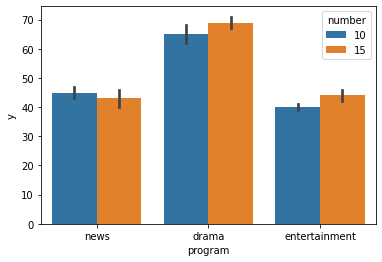

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='program', y='y',  hue='number', data=data)
plt.show()

In [11]:
import pandas as pd
data=pd.read_csv('ex8-4.csv')
data.head()

,drug,y
0,A,5.2
1,B,9.1
2,C,3.2
3,D,2.4
4,E,7.1


In [12]:
fit=smf.ols('y~drug', data).fit()
sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
drug,4.0,78.4216,19.6054,6.586508,0.001497
Residual,20.0,59.5320,2.9766,NaN,NaN


In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#tukey
tukey=pairwise_tukeyhsd(endog=data['y'], groups=data['drug'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     2.46 0.2009 -0.8052  5.7252  False
     A      C    -1.14 0.8316 -4.4052  2.1252  False
     A      D    -2.46 0.2009 -5.7252  0.8052  False
     A      E     1.52 0.6389 -1.7452  4.7852  False
     B      C     -3.6 0.0263 -6.8652 -0.3348   True
     B      D    -4.92 0.0018 -8.1852 -1.6548   True
     B      E    -0.94 0.9075 -4.2052  2.3252  False
     C      D    -1.32  0.746 -4.5852  1.9452  False
     C      E     2.66  0.146 -0.6052  5.9252  False
     D      E     3.98 0.0123  0.7148  7.2452   True
----------------------------------------------------


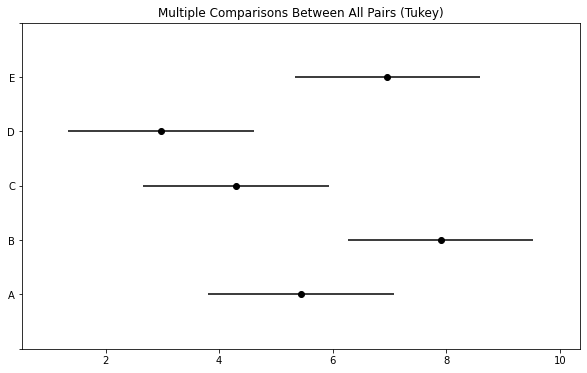

In [16]:
fig=tukey.plot_simultaneous()

In [17]:
!pip install scikit_posthocs

In [18]:
import scikit_posthocs as sp
#scheffe
scheffe=sp.posthoc_scheffe(data, val_col='y', group_col='drug')
print(scheffe)

          A         B         C         D         E
A  1.000000  0.314403  0.891980  0.314403  0.746483
B  0.314403  1.000000  0.058667  0.005433  0.943190
C  0.891980  0.058667  1.000000  0.830024  0.244027
D  0.314403  0.005433  0.830024  1.000000  0.030467
E  0.746483  0.943190  0.244027  0.030467  1.000000


In [19]:
sp.posthoc_tukey_hsd(data['y'], data['drug'])

,A,B,C,D,E
A,1,0,0,0,0
B,0,1,1,1,0
C,0,1,1,0,0
D,0,1,0,1,1
E,0,0,0,1,1


In [29]:
#분산분석 잔차분석
import pandas as pd
data=pd.read_csv('ex8-5.csv')
data

,DRUG,Y
0,D1,49.20
1,D1,44.54
2,D1,45.80
3,D1,95.84
4,D1,30.10
5,D1,36.50
6,D1,82.30
7,D1,87.35
8,D1,105.00
9,D1,95.22


In [22]:
import statsmodels.api as ssm
import statsmodels.formula.api as smf
fit1=smf.ols('Y~DRUG', data).fit()
sm.stats.anova_lm(fit1)

,df,sum_sq,mean_sq,F,PR(>F)
DRUG,3.0,13942.272908,4647.424303,3.570808,0.02199
Residual,41.0,53361.697172,1301.504809,NaN,NaN


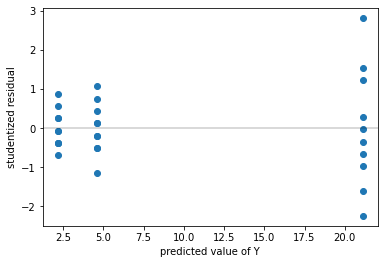

In [54]:
import matplotlib.pylab as plt
plt.plot(fit1.predict(), fit1.resid_pearson, 'o')
plt.axhline(y=0, color='k', linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized residual')
plt.show()

In [127]:
#분산분석 잔차분석
import pandas as pd
data=pd.read_csv('ex8-6.csv')
data

,country,y
0,A,0
1,A,2
2,A,1
3,A,3
4,A,1
5,A,2
6,A,3
7,A,4
8,A,1
9,A,5


In [128]:
data.groupby(['country']).describe()[['y']]

y                                                
        count  mean       std   min    25%   50%    75%   max
country                                                      
A        10.0   2.2  1.549193   0.0   1.00   2.0   3.00   5.0
B        10.0   4.6  2.065591   1.0   3.25   4.5   5.75   8.0
C        10.0  21.1  4.840799  14.0  18.25  20.5  24.25  30.0

In [129]:
data.groupby(['country']).var()[['y']]

,y
country,
A,2.400000
B,4.266667
C,23.433333


In [130]:
from scipy import stats
stats.levene(data.y[data.country=='A'],
             data.y[data.country=='B'], data.y[data.country=='C'])

LeveneResult(statistic=4.96330275229358, pvalue=0.014599201232619121)

In [131]:
import numpy as np
data['sqrty']=np.sqrt(data.y + 0.375)
data

,country,y,sqrty
0,A,0,0.612372
1,A,2,1.541104
2,A,1,1.172604
3,A,3,1.837117
4,A,1,1.172604
5,A,2,1.541104
6,A,3,1.837117
7,A,4,2.091650
8,A,1,1.172604
9,A,5,2.318405


In [132]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit2=smf.ols('y~country', data).fit()
sm.stats.anova_lm(fit2)

,df,sum_sq,mean_sq,F,PR(>F)
country,2.0,2117.4,1058.700000,105.518272,1.732693e-13
Residual,27.0,270.9,10.033333,NaN,NaN


In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit3=smf.ols('sqrty~country', data).fit()
sm.stats.anova_lm(fit3)

,df,sum_sq,mean_sq,F,PR(>F)
country,2.0,52.638841,26.319420,101.49813,2.755373e-13
Residual,27.0,7.001354,0.259309,NaN,NaN


C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


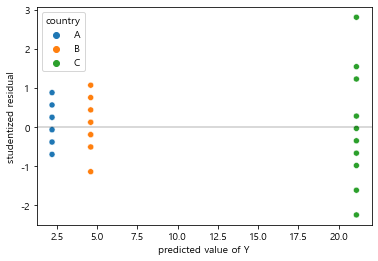

In [134]:
import matplotlib.pylab as plt
import seaborn as sbn

sbn.scatterplot(fit2.predict(), fit2.resid_pearson, hue='country', data=data)
plt.axhline(y=0, color='k', linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized residual')
plt.show()

C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


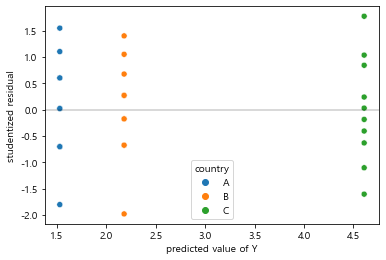

In [135]:
import matplotlib.pylab as plt
import seaborn as sbn

sbn.scatterplot(fit3.predict(), fit3.resid_pearson, hue='country', data=data)
plt.axhline(y=0, color='k', linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized residual')
plt.show()

In [2]:
import pandas as pd
data=pd.read_csv('8.9.csv')
data

,level,y,x
0,1.0,1665000.0,13.2
1,1.0,2750000.0,20.5
2,1.0,1645000.0,12.9
3,1.0,3300000.0,22.1
4,1.0,3021000.0,20.0
...,...,...,...
58,NaN,NaN,NaN
59,NaN,NaN,NaN
60,NaN,NaN,NaN
61,NaN,NaN,NaN


In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit1=smf.ols('y~C(level)', data).fit()
sm.stats.anova_lm(fit1)

,df,sum_sq,mean_sq,F,PR(>F)
C(level),2.0,1.113412e+13,5.567059e+12,25.599704,0.000002
Residual,21.0,4.566781e+12,2.174658e+11,NaN,NaN


In [3]:
#공분산분석
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit4=smf.ols('y~x+C(level)', data).fit()
sm.stats.anova_lm(fit4, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,5.489001e+09,1.0,0.115700,7.372926e-01
C(level),9.162114e+10,2.0,0.965617,3.978043e-01
x,3.617945e+12,1.0,76.260739,2.933163e-08
Residual,9.488356e+11,20.0,NaN,NaN


In [4]:
print(fit4.summary())
fit4.params.round(1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     103.7
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           2.34e-12
Time:                        01:12:19   Log-Likelihood:                -326.86
No. Observations:                  24   AIC:                             661.7
Df Residuals:                      20   BIC:                             666.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.049e+05   3.08e+05     

Intercept         -104878.2
C(level)[T.2.0]   -176640.0
C(level)[T.3.0]   -114890.0
x                  137133.6
dtype: float64

In [66]:
data.groupby(['level']).describe()

y                                                             \
      count       mean            std        min        25%        50%   
level                                                                    
1.0     8.0  2502375.0  693590.026601  1645000.0  1929750.0  2520000.0   
2.0     8.0  1571500.0  371461.591939  1160000.0  1303750.0  1427500.0   
3.0     8.0   837875.0  182609.996206   529000.0   741500.0   841500.0   

                                x                                         \
             75%        max count     mean       std   min     25%   50%   
level                                                                      
1.0    3090750.0  3330000.0   8.0  19.0125  4.232337  12.9  17.100  19.8   
2.0    1836250.0  2197000.0   8.0  13.5125  2.978704   9.8  10.700  13.6   
3.0     940000.0  1075000.0   8.0   7.7125  0.835699   6.7   7.075   7.6   

                     
          75%   max  
level                
1.0    20.900  25.4  
2.0    15.925  17.4  
3.0     8.250   9.1

In [110]:
# 실습
import numpy as np
import pandas as pd

desa=pd.read_csv('대사중후군.csv', encoding='CP949')

In [111]:
label={1:'실험군A', 2:'실험군B', 3:'대조군'}
desa.group=desa.group.map(label)
desa.groupby(['group']).describe()[['wc2']]

wc2                                                         
      count       mean        std   min    25%    50%     75%    max
group                                                               
대조군    20.0  95.200000  13.094193  74.2  88.00  94.50  98.825  139.7
실험군A   38.0  89.965789   5.757452  77.0  85.85  90.75  93.825  104.0
실험군B   33.0  88.751515   7.326285  77.0  83.00  87.80  92.000  108.0

In [112]:
from scipy import stats
stats.levene(desa.wc2[desa.group=='실험군A'],
             desa.wc2[desa.group=='실험군B'], desa.wc2[desa.group=='대조군'])

LeveneResult(statistic=2.7535232190870733, pvalue=0.06919690063423431)

In [113]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit5=smf.ols('wc2~group', desa).fit()
sm.stats.anova_lm(fit5)

,df,sum_sq,mean_sq,F,PR(>F)
group,2.0,550.718863,275.359431,3.907213,0.023674
Residual,88.0,6201.767951,70.474636,NaN,NaN


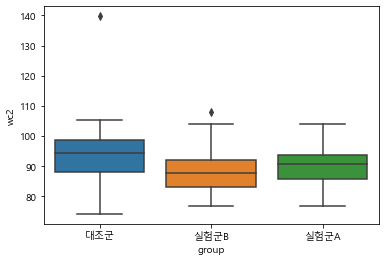

In [114]:
#!python han-font.py
exec(open('han-font.py').read())

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='group', y='wc2', data=desa)
plt.show()

In [115]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#tukey
tukey=pairwise_tukeyhsd(endog=desa['wc2'], groups=desa['group'], alpha=0.1)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.10 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   대조군   실험군A  -5.2342 0.0674 -10.0566 -0.4118   True
   대조군   실험군B  -6.4485 0.0218 -11.3952 -1.5017   True
  실험군A   실험군B  -1.2143 0.8162   -5.368  2.9394  False
-----------------------------------------------------


C:\Users\gksxk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


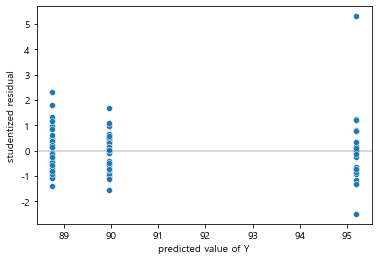

In [116]:
import matplotlib.pylab as plt
import seaborn as sbn

sbn.scatterplot(fit1.predict(), fit1.resid_pearson, data=desa)
plt.axhline(y=0, color='k', linewidth=0.3)
plt.xlabel('predicted value of Y')
plt.ylabel('studentized residual')
plt.show()

In [117]:
label={1:'건강 매우좋음', 2:'건강 좋음', 3:'건강 보통', 4:'건강 나쁨', 5:'건강 매우나쁨'}
desa.건강=desa.건강.map(label)
desa.groupby(['건강']).describe()[['wc2']]

wc2                                                        
        count       mean        std   min    25%   50%     75%    max
건강                                                                   
건강 나쁨    28.0  91.167857   6.414454  77.0  87.65  92.0  94.050  105.3
건강 매우나쁨   9.0  94.300000   7.232220  80.7  90.20  95.9  99.100  104.0
건강 보통    24.0  88.508333   7.669018  74.2  83.45  89.6  93.375  108.0
건강 좋음    27.0  90.174074  11.429738  79.7  84.50  87.8  91.600  139.7

In [118]:
from scipy import stats
stats.levene(desa.wc2[desa.건강=='건강 매우나쁨'], desa.wc2[desa.건강=='건강 나쁨']
             ,desa.wc2[desa.건강=='건강 보통'],desa.wc2[desa.건강=='건강 좋음'])

LeveneResult(statistic=0.26735427559694586, pvalue=0.8487536039394973)

In [119]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit6=smf.ols('wc2~건강', desa).fit()
sm.stats.anova_lm(fit6)

,df,sum_sq,mean_sq,F,PR(>F)
건강,3.0,240.363175,80.121058,1.071906,0.365521
Residual,84.0,6278.691257,74.746324,NaN,NaN


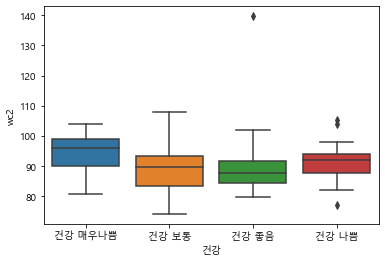

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='건강', y='wc2', data=desa)
plt.show()

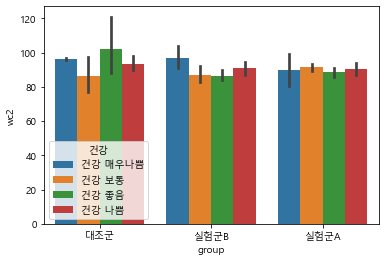

In [121]:
import matplotlib.pylab as plt
import seaborn as sns

sns.barplot(x='group', y='wc2', hue='건강', data=desa)
plt.show()

In [125]:
#공분산분석
import statsmodels.api as sm
import statsmodels.formula.api as smf

fit7=smf.ols('wc2~wc1+C(group)', desa).fit()
sm.stats.anova_lm(fit7, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,520.635496,1.0,26.222929,1.805395e-06
C(group),389.528966,2.0,9.809733,1.439460e-04
wc1,4474.451840,1.0,225.365414,7.099138e-26
Residual,1727.316111,87.0,NaN,NaN


In [126]:
print(fit7.summary())
fit7.params.round(1)

                            OLS Regression Results                            
Dep. Variable:                    wc2   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     84.37
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.14e-25
Time:                        16:08:40   Log-Likelihood:                -263.05
No. Observations:                  91   AIC:                             534.1
Df Residuals:                      87   BIC:                             544.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           24.6128      4.806  

Intercept           24.6
C(group)[T.실험군A]    -5.4
C(group)[T.실험군B]    -4.0
wc1                  0.7
dtype: float64

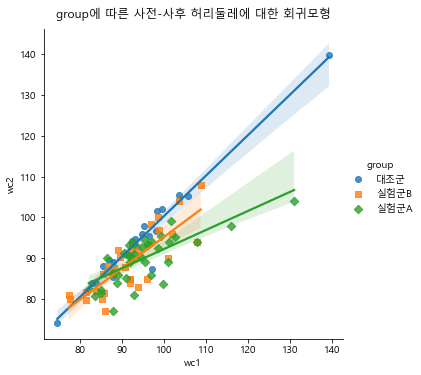

In [138]:
import matplotlib.pylab as plt
import seaborn as sns

sns.lmplot(x='wc1', y='wc2', hue='group', data=desa, markers=['o', 's', 'D'])
plt.title('group에 따른 사전-사후 허리둘레에 대한 회귀모형', y=1.02)
plt.show()